To generate a dataset, I will use the quadratic function y = 2x^2 + 3x + 4. I will generate 100 samples with random values of x between -10 and 10.

In [40]:
import numpy as np

x = np.random.uniform(-10, 10, size=100)
y = 2 * x ** 2 + 3 * x + 4 + np.random.normal(scale=5, size=100)


**Linear Regression**

In [41]:
from sklearn.linear_model import LinearRegression

X = np.column_stack([x**2, x, np.ones_like(x)])
coefficients = np.linalg.inv(X.T @ X) @ X.T @ y
print("Coefficients from linear regression closed-form solution:", coefficients)


Coefficients from linear regression closed-form solution: [1.99314475 2.9874892  3.66334802]


Ridge, LASSO and ElasticNet

**Ridge Regression**

In [49]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X, y)
print("Coefficients from ridge regression:", ridge.coef_)

Coefficients from ridge regression: [1.99315425 2.98667475 0.        ]


**LASSO Regression**

In [50]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)
lasso.fit(X, y)
print("Coefficients from LASSO regression:", lasso.coef_)

Coefficients from LASSO regression: [1.9931673  2.96052161 0.        ]


**ElasticNet Regression**

In [45]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=1.0, l1_ratio=0.5)
elasticnet.fit(X, y)
print("Coefficients from ElasticNet regression:", elasticnet.coef_)

Coefficients from ElasticNet regression: [1.99360839 2.93401569 0.        ]


**Ploting the solutions**

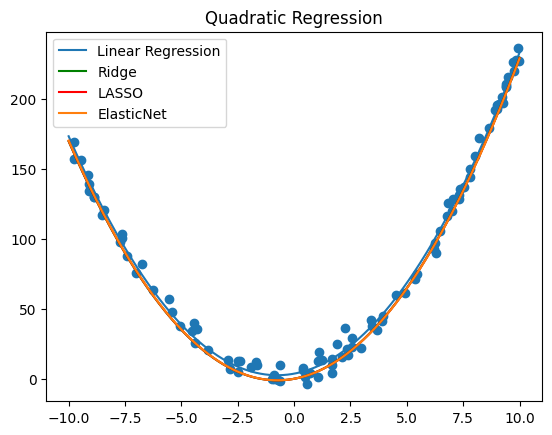

In [46]:
import matplotlib.pyplot as plt
x_plot = np.linspace(-10, 10, 1000)
plt.scatter(x, y)
plt.plot(x_plot, coefficients[0]*x_plot**2 + coefficients[1]*x_plot + coefficients[2], label="Linear Regression")
plt.plot(x_plot, ridge.coef_[0]*x_plot**2 + ridge.coef_[1]*x_plot + ridge.coef_[2], label="Ridge", color='g')
plt.plot(x_plot, lasso.coef_[0]*x_plot**2 + lasso.coef_[1]*x_plot + lasso.coef_[2], label="LASSO", color='r')
plt.plot(x_plot, elasticnet.coef_[0]*x_plot**2 + elasticnet.coef_[1]*x_plot + elasticnet.coef_[2], label="ElasticNet")

plt.legend()
plt.title("Quadratic Regression")


plt.show()

**Conclusion**